In [ ]:
"""loading dependencies"""

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn


In [35]:
"""reading the daily energy csv file which contains the energy generated by the house/day
house_0 is the dataframe which contains a unique house data in the block, the graph shows the energy consumed 
per day for 500+days"""

'reading the daily energy csv file which contains the energy generated by the house/day\nhouse_0 is the dataframe which contains a unique house data in the block, the graph shows the energy consumed \nper day for 500'

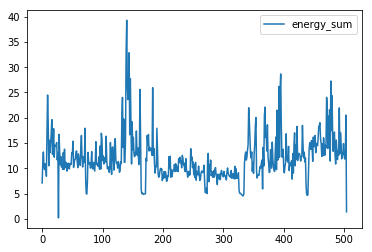

In [2]:
data=pd.read_csv("/mnt/F8F8B8AFF8B86E0E/SMART GRID/daily dataset/daily_dataset/block_0.csv")
house_0=data.iloc[:505,[1,-2]]
house_0.plot()
plt.show()


In [ ]:
"""the house_0 is a dataframe and in order to carry out the preprocessing and converting it to array, the dataframe's
value is being considered, this house_0 has only the values for the generated for 500 days"""

In [3]:
house_0=data.iloc[:505,[-2]].values

In [ ]:
"""Loading the deep learning libraries for building the LSTM model
 """

In [4]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


Using TensorFlow backend.


In [ ]:
"""LSTMS model are very senstive to range of values because of the sigmoid and tanh activation function. to avoid 
anomaly behaviour of the model, the data is normalized between 0 and 1, this avoids the scaling out from the range
and this scaling is done using the minmax module from preprocessing class in the sklearn"""

In [5]:
minmax=MinMaxScaler(feature_range=(0,1))

house_0=minmax.fit_transform(house_0)
house_0 = house_0.astype('float32')


In [ ]:
"""this is the part where the training and testing size is being determined and also the train and test
data is split, the training and testing ratio is 70% and 30% respectively. With time series data, the sequence 
is very important and hence splitting the data is done is sequence"""

In [6]:
np.random.seed(7)

train_size=int(len(house_0)*0.70)
test_size=len(house_0)-train_size

train,test=house_0[0:train_size,:], house_0[train_size:len(house_0),:]

In [ ]:
"""the create_dataset takes two arguments ,dataset and the lookback. the dataset comrpising the dataset having the 
time series data and the look_back arguments which uses how much time we should look back for input_variables, 
accordingly the dataX and dataY array is generated"""

#FOR EXAMPLE
"""X Y
 50 51
 51 67
 67 89
 89 56
 56 19"""

In [7]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)


In [ ]:
"""The deafult look back is set to 1"""
#creating the training and testing time series data
# LSTM network expects the input data (X) to be provided with a specific array structure in the form of: 
#[samples, time steps, features].
#LSTM ONLY TAKE 3D SHAPE INPUT ( A TENSOR )
#ur data is in the form: [samples, features] and we are framing the problem as one time step for each sample. 
#We can transform the prepared train and test input data into the expected structure using numpy.reshape() 
#as follows:

In [ ]:
"""iterating the model for 50 epoch , maximizing the number of epoch doesnt suffice anything, loss stucks at 0.073 
(local minima)"""

In [40]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)


Epoch 1/50
 - 1s - loss: 0.0260
Epoch 2/50
 - 1s - loss: 0.0098
Epoch 3/50
 - 1s - loss: 0.0094
Epoch 4/50
 - 1s - loss: 0.0091
Epoch 5/50
 - 1s - loss: 0.0087
Epoch 6/50
 - 1s - loss: 0.0084
Epoch 7/50
 - 1s - loss: 0.0082
Epoch 8/50
 - 1s - loss: 0.0080
Epoch 9/50
 - 1s - loss: 0.0078
Epoch 10/50
 - 1s - loss: 0.0076
Epoch 11/50
 - 1s - loss: 0.0076
Epoch 12/50
 - 1s - loss: 0.0075
Epoch 13/50
 - 1s - loss: 0.0074
Epoch 14/50
 - 1s - loss: 0.0074
Epoch 15/50
 - 1s - loss: 0.0073
Epoch 16/50
 - 1s - loss: 0.0073
Epoch 17/50
 - 1s - loss: 0.0073
Epoch 18/50
 - 1s - loss: 0.0074
Epoch 19/50
 - 1s - loss: 0.0074
Epoch 20/50
 - 1s - loss: 0.0073
Epoch 21/50
 - 1s - loss: 0.0073
Epoch 22/50
 - 1s - loss: 0.0073
Epoch 23/50
 - 1s - loss: 0.0074
Epoch 24/50
 - 1s - loss: 0.0074
Epoch 25/50
 - 1s - loss: 0.0073
Epoch 26/50
 - 1s - loss: 0.0073
Epoch 27/50
 - 1s - loss: 0.0073
Epoch 28/50
 - 1s - loss: 0.0073
Epoch 29/50
 - 1s - loss: 0.0074
Epoch 30/50
 - 1s - loss: 0.0073
Epoch 31/50
 - 1s -

In [ ]:
"""4 lstm blocks is used for the model and the default activation function sigmoid is used , the visible laye has only
1 input and the output layer that makes the single value prediction """

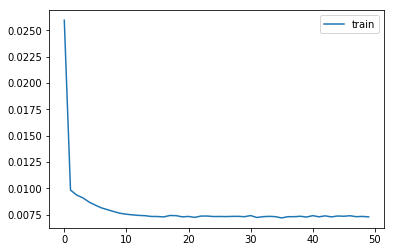

In [41]:
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

In [43]:
print(history.history.keys())


dict_keys(['loss'])


In [ ]:
"""Computing and storing the predicted value and performing the inverse tranform method to get the actual value 
from the trainpredict and testpredict  and then computing the RMSE score"""

In [44]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = minmax.inverse_transform(trainPredict)
trainY = minmax.inverse_transform([trainY])
testPredict = minmax.inverse_transform(testPredict)
testY = minmax.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.3f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.3f RMSE' % (testScore))


Train Score: 3.335 RMSE
Test Score: 4.163 RMSE


In [33]:
fig = plt.figure()
fig.set_figheight(30)
fig.set_figwidth(10)


<Figure size 720x2160 with 0 Axes>

In [ ]:
"the plot shows the distirbution of energy_sum(energy produced) by the house / day for the 500 days"

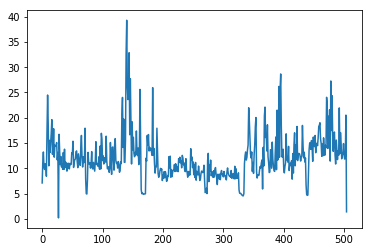

In [34]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(house_0)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(house_0)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(house_0)-1, :] = testPredict
# plot baseline and predictions
plt.plot(minmax.inverse_transform(house_0))
#plt.plot(trainPredictPlot,color="red")
#plt.plot(testPredictPlot)
plt.show()


In [ ]:
"""the plot represents the training value generated (energy_sum /day ) by the model for 350 days"""

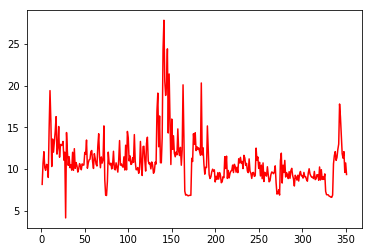

In [26]:
#plt.plot(minmax.inverse_transform(house_0))
plt.plot(trainPredictPlot,color="red")
#plt.plot(testPredictPlot)
plt.show()

In [ ]:
"""the plot represents the testing value(energy_sum) generated by the model for unseen data meaning for next 240 days"""

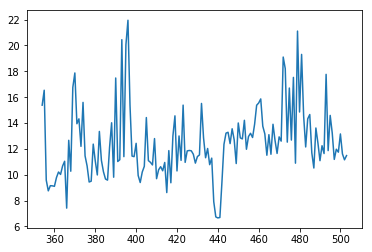

In [15]:
#plt.plot(minmax.inverse_transform(house_0))
#plt.plot(trainPredictPlot,color="red")
plt.plot(testPredictPlot)
plt.show()

In [ ]:
"""comparing the actual values with the training data, the graph shows the same trend, which means our model is
not overfitting/ underfitting """

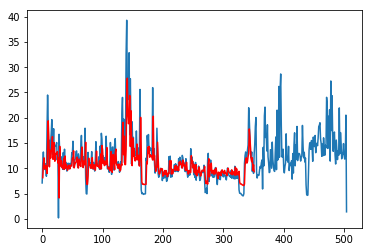

In [16]:
plt.plot(minmax.inverse_transform(house_0))
plt.plot(trainPredictPlot,color="red")
#plt.plot(testPredictPlot)
plt.show()

In [ ]:
"""comparing the actual values with the test data, same trend which validates the model work fines in predicting the
unseen data"""

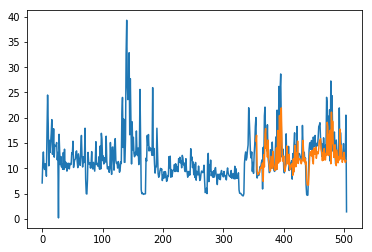

In [17]:
plt.plot(minmax.inverse_transform(house_0))
#plt.plot(trainPredictPlot,color="red")
plt.plot(testPredictPlot)
plt.show()

In [ ]:
"""comparing the training , testing with the actual values """

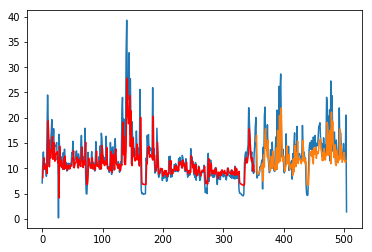

In [18]:
plt.plot(minmax.inverse_transform(house_0))
plt.plot(trainPredictPlot,color="red")
plt.plot(testPredictPlot)
plt.show()

In [27]:
fig = plt.gcf()
fig.set_size_inches(29, 10.5)
fig.savefig('test2png.png', dpi=100)

<Figure size 2088x756 with 0 Axes>

In [28]:
fig.set_size_inches(18.5, 10.5, forward=True)